In [1]:
import tensorflow as tf
import pandas as pd #Proses data -> Load Data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./churn.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df = df.drop(columns=['customer_id', 'country', 'gender'])
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0
9996,516,35,10,57369.61,1,1,1,101699.77,0
9997,709,36,7,0.00,1,0,1,42085.58,1
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [5]:
#Y itu predictor dimana target yang akan diprediksi, X adalah fitur yang memprediksi
X = df.drop(columns=['churn'])
y = df['churn']

In [6]:
#Standarisasi
#3 Jenis yaitu MinMax Scaler, Robust Scaler, dan Standard Scaler
#MinMax Scaler -> data dimana angkanya beragam akan dibentuk 2 kurva terdiri dari nilai Maksimum dan nilai Minimum
#Robust Scaler -> persebaran data angkanya tersebar secara merata ingin dicari satu pola (satu kurva yang pas)
#Standard Scaler -> standarisasi biasa aja

Standarisasi

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [8]:
#TrainTestSplit data dibagi menjadi tiga yaitu Training, Validation, dan Testing
#Validasi buat evaluasi dimana model dievaluasi dari hasil testing apakah model berjalan dengan benar
#Rule of come 60:20:20 / 70:15:15 / 80:10:10

Train Test Split

In [9]:
#Train 60, Test 20, Validasi 20
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=123)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

Tresholding bisa membuat kelas hanya ada 1 menjadi 2
RelU digunakan untuk image
Sigmoid digunakan untuk klasifikasi

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


Melihat seberapa kompleks training data pada sebuah model

Optimizer
- Adam ->komputasi lebih stabil
- SGD
-RMSprop

Activation buat setiap layer

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [13]:
history = model.fit(X_train, y_train, batch_size=64, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
94/94 [==============================] - 1s 3ms/step - loss: 0.7778 - accuracy: 0.5555 - val_loss: 0.7266 - val_accuracy: 0.5870
Epoch 2/50
94/94 [==============================] - 0s 1ms/step - loss: 0.7205 - accuracy: 0.5868 - val_loss: 0.6765 - val_accuracy: 0.6115
Epoch 3/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6714 - accuracy: 0.6168 - val_loss: 0.6335 - val_accuracy: 0.6445
Epoch 4/50
94/94 [==============================] - 0s 1ms/step - loss: 0.6304 - accuracy: 0.6477 - val_loss: 0.5982 - val_accuracy: 0.6855
Epoch 5/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5966 - accuracy: 0.6793 - val_loss: 0.5698 - val_accuracy: 0.7175
Epoch 6/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5691 - accuracy: 0.7135 - val_loss: 0.5468 - val_accuracy: 0.7465
Epoch 7/50
94/94 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.7427 - val_loss: 0.5284 - val_accuracy: 0.7690
Epoch 8/50
94/94 [==

In [14]:
predictions = model.predict(X_test)

63/63 [==============================] - 0s 629us/step


In [15]:
prediction_label = [1 if prediction > 0.5 else 0 for prediction in predictions]

In [16]:
prediction_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss",loss)
print("Accuracy", accuracy)

63/63 [==============================] - 0s 750us/step - loss: 0.4257 - accuracy: 0.8115
Loss 0.42569994926452637
Accuracy 0.8115000128746033


Text(0, 0.5, 'Loss')

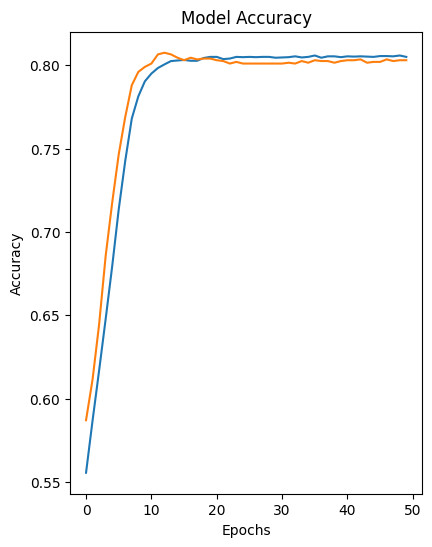

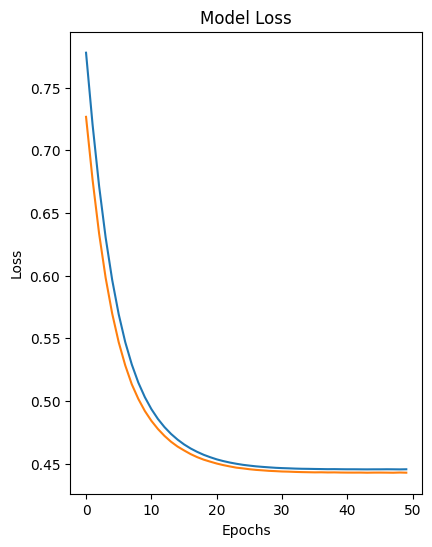

In [18]:
plt.figure(figsize= (10, 6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure(figsize= (10, 6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")